<center><h1> Credit Card Fraud Detetion Model </h1>
<h4>By: Ravikumar Patel </h4></center>


Credit card fraud is one of the biggest challenges for the financial industry. With advancements in technologies like tap-and-pay and online shopping, it became more accessible for people to use their credit cards on the fly. With this ease of use, the threat of having fraud transactions also on the rise.

According to the official website of the Government of Canada, credit card fraud is when someone steals your credit card or financial information and uses it without your permission for buying at the store, online or over the phone or taking cash out using ATM. 

If a financial institute or business fails to protect their customers from this kind of issue, people may stop doing business with them, and soon enough, they may run out of business. So, a business needs to keep their customer protected, and one of the ways to do this is by checking every transaction for the possibility of fraud. Manually checking it is next to impossible as many customers perform the transactions at the same time. But as always, Machine Learning is here to save the day. 

Following are the steps to develop a credit card fraud detection model

1.   Data Analysis
2.   Data Preprocessing
3.   Feature Selection
4.   Model Selection and Training
5.   Model Evaluation

**```Note: Since the data is highly imbalanced, the Synthetic Minority Over-sampling TEchnique (SMOTE) from imbalanced-learn was used only on training data to model the real-world closely. The models performed very well (over 95.00% AUC score) during the training. However, they did not perform well on the data without over-sampled. This experiment has been removed from the file for cleanliness. ```**

## Data Analysis

In [1]:
# basic library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to split the data into random smaller sets
from sklearn.model_selection import train_test_split

# to preprocess the features
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox

# models to solve the problems and feature selection
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# to plot/calculate the evaluations of models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

with open("creditcard.csv", 'r') as file1:
  df = pd.read_csv(file1)

display(df.head())

X_train, X_test = train_test_split(df, test_size = 0.2, random_state=5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# Number of normal and fraud transctions in the whole dataset
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

The data here is from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud). The data contains the transactions that occurred in two days by European cardholders in September 2013. For security and confidentiality reasons, original features are hidden, and PCA transformation is used to convert those features into V1 to V28 features. There are only two features which are in their original form, Time and Amount. Time represents the number of seconds passed between the transaction and the first transaction in the data, and the amount represents the value of the transaction.

As the dataset is highly imbalanced, there are 284,315 normal transactions and only 492 fraud transactions. Due to this, the area under the precision-recall curve is used as an evaluation technique for the model.


In [9]:
def buildContinuousFeaturesReport(data_df, features):
    """
    Build and display report for continuous features for given dataframe
    :param data_df: a DataFrame object containing data
    :param features: a list of features name to build report
    :return none
    """

    conHead = ['Count', 'Miss %', 'Card.', 'Min', '1st Qrt.', 'Mean', 
               'Median', '3rd Qrt.', 'Max', 'Std. Dev.']

    conOut_df = pd.DataFrame(index=features, columns=conHead)
    columns_df = data_df[features]

    #COUNT
    conOut_df[conHead[0]] = len(columns_df)

    #MISS % 
    conOut_df[conHead[1]] = columns_df.isna().sum() / len(columns_df) * 100

    #CARDINALITY
    conOut_df[conHead[2]] = columns_df.nunique()

    #MINIMUM
    conOut_df[conHead[3]] = columns_df.min()

    #1ST QUARTILE
    conOut_df[conHead[4]] = columns_df.quantile(0.25)

    #MEAN
    conOut_df[conHead[5]] = columns_df.mean()

    #MEDIAN
    conOut_df[conHead[6]] = columns_df.median()

    #3rd QUARTILE
    conOut_df[conHead[7]] = columns_df.quantile(0.75)

    #MAX
    conOut_df[conHead[8]] = columns_df.max()

    #STANDARD DEVIATION
    conOut_df[conHead[9]] = columns_df.std()

    display(conOut_df)
 
quantitativefeatures = X_train.select_dtypes('number').columns.tolist()
buildContinuousFeaturesReport(X_train, quantitativefeatures)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev.
Time,227845,0.0,113985,0.000000,54203.000000,94779.437697,84676.000000,139271.000000,172792.000000,47485.850888
V1,227845,0.0,221406,-46.855047,-0.921021,0.000092,0.019948,1.315776,2.454930,1.954981
V2,227845,0.0,221406,-63.344698,-0.599405,-0.000897,0.064203,0.802627,22.057729,1.651702
V3,227845,0.0,221406,-48.325589,-0.890429,-0.000796,0.179494,1.026862,9.382558,1.515422
V4,227845,0.0,221406,-5.683171,-0.846925,0.001805,-0.017958,0.746727,16.875344,1.415401
V5,227845,0.0,221406,-113.743307,-0.691591,-0.000405,-0.054737,0.611173,34.099309,1.381990
V6,227845,0.0,221406,-23.496714,-0.768081,-0.000477,-0.273124,0.399057,73.301626,1.332391
V7,227845,0.0,221406,-43.557242,-0.554991,-0.000108,0.039765,0.569977,120.589494,1.240052
V8,227845,0.0,221406,-73.216718,-0.208537,-0.001457,0.022263,0.326367,20.007208,1.196880
V9,227845,0.0,221406,-13.320155,-0.641844,0.002917,-0.049520,0.601508,15.594995,1.098430


Feature: Time
Span: 172792.0
Min: 0.0
Max: 172792.0


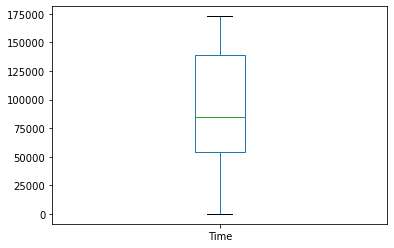

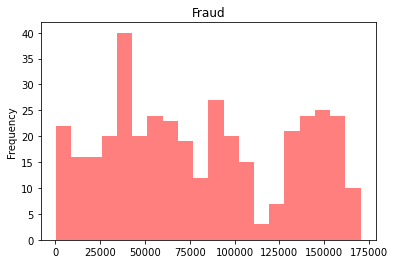

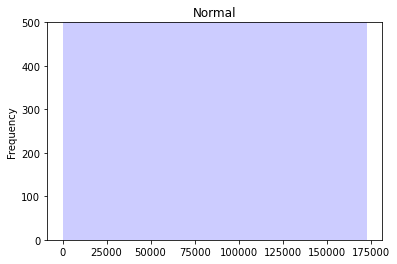

Feature: V1
Span: 49.309977191993
Min: -46.85504720078179
Max: 2.45492999121121


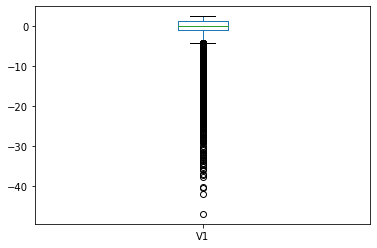

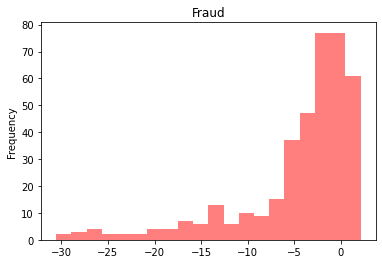

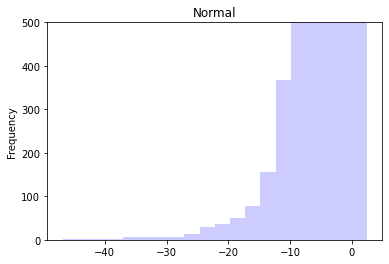

In [10]:
def box_histogram(df, features):
  """
  Display the boxplot and histrogram of given features from given dataframe
  :param df: a DataFrame object containing data
  :param feature: a list of features name to display plots
  :return none
  """

  for f in features:
    # show some statistics
    print("Feature: " + f)
    print("Span: "+ str (df[f].max() - df[f].min()))
    print("Min: "+ str (df[f].min()))
    print("Max: "+ str (df[f].max()))

    # show boxplot
    df[f].plot.box()
    plt.show()
    
    # show histogram for fraud transactions
    df[df['Class']==1][f].plot.hist(bins=20, alpha=0.5, title='Fraud', color='r')
    plt.show()

    # show histogram for normal transactions
    df[df['Class']==0][f].plot.hist(bins=20, alpha=0.2, title='Normal', color='b')
    plt.ylim(0, 500)
    plt.show()

# plotting only first 2 features, as plotting every /
# feature makes the file longer in length
box_histogram(X_train, quantitativefeatures[:2])

In [11]:
def check_skewness(df):
  """
  Calculate, display and return skewness of features of given dataframe
  :param df: a DataFrame object containing data
  :return a dictionary separating features into high or moderately skewness, 
          left or right skewness OR approximately symmetric
  """

  # create empty dictionary to store and return result
  skewness_dic = {'high' : {'right':{}, 'left':{}}, 'mod' : {'right':{}, 'left':{}}, 
                  'approx' : {}}

  # run for all the features inside dataframe
  for f in df.columns:

    # calcuate the skewness and store feature into appropriate dictionary
    skew = df[f].skew()
    if skew <= -1:
      skewness_dic['high']['left'][f] = skew
    elif skew <= -0.5:
      skewness_dic['mod']['left'][f] = skew
    elif skew <= 0.5:
      skewness_dic['approx'][f] = skew
    elif skew <= 1:
      skewness_dic['mod']['right'][f] = skew
    else:
      skewness_dic['high']['right'][f] = skew
    

  # display the result of calculation
  print("Highly skewed features")
  print("Left skewed")
  for k,v in skewness_dic['high']['left'].items():
    print(k+":"+str(v))

  print("\nRight skewed")
  for k,v in skewness_dic['high']['right'].items():
    print(k+":"+str(v))

  print("\nModerately skewed features")
  print("Left skewed")
  for k,v in skewness_dic['mod']['left'].items():
    print(k+":"+str(v))

  print("\nRight skewed")
  for k,v in skewness_dic['mod']['right'].items():
    print(k+":"+str(v))

  print("\nApproximately symmetric skewed features")
  for k,v in skewness_dic['approx'].items():
    print(k+":"+str(v))

  return skewness_dic

# get the skewness information of training dataframe
skewness_dic = check_skewness(X_train)

Highly skewed features
Left skewed
V1:-3.187649951248416
V2:-4.486109178296368
V3:-2.209637055467817
V5:-2.9504210487629683
V8:-8.494230287975071
V12:-2.309526709929887
V14:-2.0327574427204302
V16:-1.0921207837226168
V17:-3.7065728791313983
V20:-2.0780954534583116
V23:-5.851445520386401

Right skewed
V6:1.9801128737985654
V7:3.736237972299871
V10:1.2754900634713988
V21:3.7956379219641905
V28:6.464993945402006
Amount:18.155619513279305
Class:24.171031832152753

Moderately skewed features
Left skewed
V24:-0.5476560309532068
V27:-0.7153080967289098

Right skewed
V4:0.6647028859002546
V9:0.5709686568823837
V26:0.5793096779768502

Approximately symmetric skewed features
Time:-0.034949235391838425
V11:0.3713883868805592
V13:0.06793543515850227
V15:-0.3105313427522995
V18:-0.2482785846014976
V19:0.10305107793752862
V22:-0.230317407122178
V25:-0.4218894278383107


There are no missing values, and every feature that is quantitative/continuous can be seen from the quality report. So, the histograms with boxplots are used to find out the outliers and check the distributions.

Plotted histogram and domain knowledge tell us that 'Time' here is not a relevant feature; thus, it will be dropped. Of course, there is a peak in our data at 30k to 35k time value. It might be a night when Europeans are sleeping, and their credit cards are being used without their consent. However, the data are from 2 days, and there is no second peak, so this assumption is not appropriate to make.

Other features, V1 to V28, are derived features from original features using PCA techniques. There is no domain knowledge associated with them so that the statistical techniques will handle issues associated with them, namely skewness. Depending upon skewness and direction, different methods will be used to make it more normally distributed. Also, to convert values into positive float numbers without disturbing the distribution, a Min-Max transformation will be used on left-skewed features.


## Data Preprocessing

<h4><center>Table 1 : Data Quality Plan</center></h4>

| Feature | Data Quality Issue | Potential Handling Strategies|
|---|---|---|
|Time|Not revant info.| Drop the feature.|
|V1, V2, V3, V5, V8, V12, V14, V16, V17, V20, V23| Highly left skewed, but has zeros and neg  | Min-Max normalization than Cube transformation |
|V6, V7, V10, V21, V28| Highly right skewed, but has zeros and neg | Cube root tranformation |
|V24, V27| Moderately left skewed, but has zeros and neg | Min-Max normalization than Square transformation |
|V4, V9, V26| Moderately right skewed, but has zeros and neg  | Cube root transformation |
|V11, V13, V15, V18, V19, V22, V25|Approximately symmetric but has outliers, zeros and neg | Z-normalization. |
|Amount|Highly right skewed with only positive numbers | Box cox trasformation. |


Here, we built a Data Quality Plan (DQP) to pre-process the data to handle data quality issues. For the highly skewed features towards the left, first, use the Min-Max normalization to fix the range of values and then use cube transformation to reduce the skewness. As mentioned earlier, Min-Max transformation helps with the problem of mapping negative and positive numbers to the same value. The Min-Max transformation for these features is specified with a small range as cube root would grow exponentially.

The features with moderately left-skewed values are handled similar way, except cube transformation gets replaced by square and double the range for Min-Max normalization. The features with highly or moderately right skewness are transformed using cube-root transformation, as this technique has shown good results and can handle negatives and zeros.

For the approximately symmetrical features, Z-normalization can normalize the values. As the 'Amount' contains only positive values so that box-cox transformation can be used. The 'Time' feature will just get dropped.


In [12]:
def preprocessing(df):
  """
  Preprocess given dataframe according to handling techniques according to 
  table 1
  :param df: a DataFrame object containing data
  :return preprocessed dataframe
  """
  # transform features using cube root
  features = list(set(skewness_dic['high']['right'].keys()).union
                  (skewness_dic['mod']['right'].keys()) 
                  - set(['Amount', 'Class']))
  df[features] = np.cbrt(df[features])

  # tranform features using minmax and then cube
  features = list(skewness_dic['high']['left'].keys())
  df[features] = MinMaxScaler((1,5)).fit_transform(df[features])
  df[features] = np.power(df[features], 3)

  # tranform features using minmax and then squared
  features = list(skewness_dic['mod']['left'].keys())
  df[features] = MinMaxScaler((1,10)).fit_transform(df[features])
  df[features] = np.power(df[features], 2)

  # transform features using Z-transformation
  features = list(set(skewness_dic['approx'].keys()) - set(['Time']))
  df[features] = StandardScaler().fit_transform(df[features])

  # transform features using boxcox transformation
  df.loc[:,'Amount'] =  df['Amount'] + 0.0000000000001
  df['Amount'], _ = boxcox(df['Amount'])

  # drop feature like time
  df = df.drop(['Time'], axis=1)
  
  return df

## Feature selection

In [13]:
# separate target variable from the training and test dataframes
y_train = X_train['Class']
y_test = X_test['Class']

X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)

# preproce both dataframes
X_train = preprocessing(X_train)
X_test = preprocessing(X_test)

# split the training dataset into training and validation sets
X_training, X_vali, y_training, y_vali = train_test_split(X_train, y_train, test_size = 0.2, random_state=10)

In [14]:
def scorer(estimator, X, y):
  """
  To calculates AUC for precision-recall curve for given estimator
  works as a scoring function for RFECV
  :param estimator: a DataFrame object containing data
  :param X: a DataFrame object containing data
  :param y: contains true label of given data
  :return AUC score for precision-recall curve
  """

  y_pred = estimator.predict(X)
  
  precision, recall, _ = precision_recall_curve(y_pred, y)

  return auc(recall, precision)

# create a base estimator for recursive feature elimination with 
# cross-validated selection
treeClassifier = DecisionTreeClassifier(random_state = 2)

selector = RFECV(estimator=treeClassifier, scoring=scorer, n_jobs=-1)

selector.fit(X_training, y_training)

print("Optimal number of features : " + str(selector.n_features_))

Optimal number of features : 11


In [15]:
selected_features = selector.support_

# dropped unselected features
X_train = X_train.loc[:, selected_features]
X_training = X_training.loc[:, selected_features]
X_vali = X_vali.loc[:, selected_features]
X_test = X_test.loc[:, selected_features]

First, target variables are separated from predictive features, and then the training set is split into training and validation sets. The validation set will be used to decide which model to use to evaluate the performance.

For the feature selection part, recursive feature elimination with cross-validation is used with the user-define function for scoring estimators. Since the number of features is less recursive, feature elimination works just fine, and a standard Decision Tree classifier is used to score the features.

The user-define function for scoring estimators uses sklearn's method to calculate precision-recall curve and then find and return the AUC.


## Model Selection and Training

In [16]:
# build ensembled models to get train on training data
gbc = GradientBoostingClassifier(loss='exponential', random_state=10, 
                                 n_iter_no_change=5)

RFC = RandomForestClassifier(criterion='entropy', random_state=10, 
                             max_features='log2', n_estimators = 150, 
                             n_jobs=-1)

# train the models
RFC.fit(X_training, y_training)
gbc.fit(X_training, y_training)

# predict the values for validation set
y_vali_rfc = RFC.predict(X_vali)
y_vali_gbc = gbc.predict(X_vali)

# calculate precision-recall curve
rfc_precision, rfc_recall, _ = precision_recall_curve(y_vali, y_vali_rfc)
gbc_precision, gbc_recall, _ = precision_recall_curve(y_vali, y_vali_gbc)

# display the AUC for precision-recall curve
print("AUC for RFC: {:.5f}".format(auc(rfc_recall, rfc_precision)))
display(confusion_matrix(y_vali, y_vali_rfc))

print("AUC for GBC: {:.5f}".format(auc(gbc_recall, gbc_precision)))
display(confusion_matrix(y_vali, y_vali_gbc))

AUC for RFC: 0.87416


array([[45487,     4],
       [   15,    63]], dtype=int64)

AUC for GBC: 0.85401


array([[45484,     7],
       [   15,    63]], dtype=int64)

Here, ensemble methods like Random Forest Classifier (RFC) and Gradient Boosting Classifier (GBC) were used. Multiple experiments were performed to tune the parameters and balance out the bias-variance trade-off with the help of a validation set. 

The experimental parameters for the RFC included n_estimators, criterion, max_depth, and max_features, and for the GBC included loss, n_estimators, n_iter_no_change, and learning_rate. The best performing models were selected, and clearly, RFC performed better than GBC. The RFC gave a little higher precision on fraud transactions than GBC, but both had the same number for true positive (correctly identified fraud transactions).


## Model Evaluation

AUC for RFC: 0.80101

Confusion Matrix for RFC


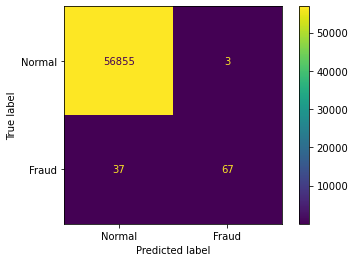


Classification Report for RFC
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56858
       Fraud       0.96      0.64      0.77       104

    accuracy                           1.00     56962
   macro avg       0.98      0.82      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [17]:
RFC = RandomForestClassifier(criterion='entropy', random_state=10, 
                             max_features='log2', n_estimators = 150, 
                             n_jobs=-1)

RFC.fit(X_train, y_train)

y_test_pred = RFC.predict(X_test)

rfc_precision, rfc_recall, _ = precision_recall_curve(y_test, y_test_pred)

print("AUC for RFC: {:.5f}".format(auc(rfc_recall, rfc_precision)))

print("\nConfusion Matrix for RFC")
plot_confusion_matrix(RFC, X_test, y_test, display_labels=['Normal', 'Fraud'])
plt.show()

print("\nClassification Report for RFC")
print(classification_report(y_test, y_test_pred, target_names=['Normal', 'Fraud']))

Now, it's time to evaluate our model against the unseen data. As the work of the validation set is finished, the RFC model can be re-train on the whole training set before it gets evaluated against the test set. Of course, the model was re-initialized as well to remove previous information and start fresh. After re-training, the model was evaluated against the test set. The area under the precision-recall curve is **80.10%**, recall for fraud transactions is 64.42%, and precision for fraud transactions is 95.71%. 

The imbalanced dataset is highly affecting the performance. Of course, the AUC score is good but not as high as it should be. The True Positive number is one of the highest important values, and it represents how many transactions the model correctly identified as fraud. The model should provide this value as high as possible for the model to affect business effectively. The model indeed identified 67 out of 104 fraud transactions, which means that there is still a possibility for an improvement. 

One way to improve the performance is to try samples with more fraud transactions, i.e. increase training data size. The more the data model gets, the higher the performance it can provide. Another way is to use some more complex models like neural networks. Also, a good point to notice is that the precision for fraud transactions is good and is also as important as finding true fraud transactions.

Next, this model can become a baseline model, and further experiments can be done on the dataset and models to increase the model's performance.